# LTFS Data Science FinHack 2

LTFS receives a lot of requests for its various finance offerings that include housing loan, two-wheeler loan, real estate financing and micro loans. The number of applications received is something that varies a lot with season. Going through these applications is a manual process and is tedious. Accurately forecasting the number of cases received can help with resource and manpower management resulting into quick response on applications and more efficient processing.

## Problem Statement
You have been appointed with the task of forecasting daily cases for next 3 months for 2 different business segments aggregated at the country level keeping in consideration the following major Indian festivals (inclusive but not exhaustive list): Diwali, Dussehra, Ganesh Chaturthi, Navratri, Holi etc. (You are free to use any publicly available open source external datasets). Some other examples could be:

Weather Macroeconomic variables Note that the external dataset must belong to a reliable source.

Data Dictionary The train data has been provided in the following way:

* For business segment 1, historical data has been made available at branch ID level For business segment 2, historical data has been made available at State level.

Train File Variable Definition application_date Date of application segment Business Segment (1/2) branch_id Anonymised id for branch at which application was received state State in which application was received (Karnataka, MP etc.) zone Zone of state in which application was received (Central, East etc.) case_count (Target) Number of cases/applications received

Test File Forecasting needs to be done at country level for the dates provided in test set for each segment.

Variable Definition id Unique id for each sample in test set application_date Date of application segment Business Segment (1/2)

### Evaluation
Evaluation Metric The evaluation metric for scoring the forecasts is **MAPE (Mean Absolute Percentage Error)* M with the formula:


Where At is the actual value and Ft is the forecast value.

The Final score is calculated using MAPE for both the segments using the formula:

### Important Notes

Note that feasibility of implementation of top solutions will be considered while adjudging winners The solution must produce satisfactory results for both the business segments

Public and Private Split Test data is further divided into Public (1st Month) and Private (Next 2 months)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ltfs-2020/sample_submission_IIzFVsf.csv
/kaggle/input/ltfs-2020/train_fwYjLYX.csv
/kaggle/input/ltfs-2020/test_1eLl9Yf.csv


In [2]:
train=pd.read_csv('/kaggle/input/ltfs-2020/train_fwYjLYX.csv')
test=pd.read_csv('/kaggle/input/ltfs-2020/test_1eLl9Yf.csv')
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

s=pd.read_csv('/kaggle/input/ltfs-2020/sample_submission_IIzFVsf.csv')

In [3]:
# train[train['segment']==1][['application_date','case_count']].sort_values('application_date').set_index('application_date')

train['application_date']=pd.to_datetime(train['application_date'],format='%Y-%m-%d')
test['application_date']=pd.to_datetime(test['application_date'],format='%Y-%m-%d')

In [4]:
train.groupby(['application_date','segment','branch_id']).mean().reset_index()

,application_date,segment,branch_id,case_count
0,2017-04-01,1,1.0,40.0
1,2017-04-01,1,3.0,58.0
2,2017-04-01,1,5.0,10.0
3,2017-04-01,1,7.0,2.0
4,2017-04-01,1,8.0,13.0
...,...,...,...,...
66893,2019-07-05,1,267.0,0.0
66894,2019-07-05,1,268.0,0.0
66895,2019-07-05,1,269.0,0.0
66896,2019-07-05,1,270.0,0.0


In [5]:

train_s1=train[train['segment']==1].groupby(['application_date']).sum().reset_index()[['application_date','case_count']].sort_values('application_date').set_index('application_date')
train_s2=train[train['segment']==2].groupby(['application_date']).sum().reset_index()[['application_date','case_count']].sort_values('application_date').set_index('application_date')
test_s1=test[test['segment']==1][['application_date']].sort_values('application_date').set_index('application_date')
test_s2=test[test['segment']==2][['application_date']].sort_values('application_date').set_index('application_date')

In [6]:
train_s1.head(10)

,case_count
application_date,
2017-04-01,299.0
2017-04-03,42.0
2017-04-04,23.0
2017-04-05,1530.0
2017-04-07,1341.0
2017-04-12,1468.0
2017-04-13,1340.0
2017-04-14,1330.0
2017-04-15,981.0


In [7]:
for k in train.columns:
    print(k,train[k].nunique())

application_date 844
segment 2
branch_id 83
state 20
zone 5
case_count 3245


In [8]:
import holidays
ind_holidays = holidays.IND(years=[2017,2018,2019])

from datetime import date
# pd.to_datetime(train['application_date'][0:10],format='%Y-%m-%d').dt.date in ind_holidays
hol=[]
for date, name in sorted(ind_holidays.items()):
#     print(str(date))
    hol.append(str(date))
hol

['2017-01-14',
 '2017-01-26',
 '2017-05-01',
 '2017-08-15',
 '2017-10-02',
 '2017-12-25',
 '2018-01-14',
 '2018-01-26',
 '2018-05-01',
 '2018-08-15',
 '2018-10-02',
 '2018-12-25',
 '2019-01-14',
 '2019-01-26',
 '2019-05-01',
 '2019-08-15',
 '2019-10-02',
 '2019-12-25']

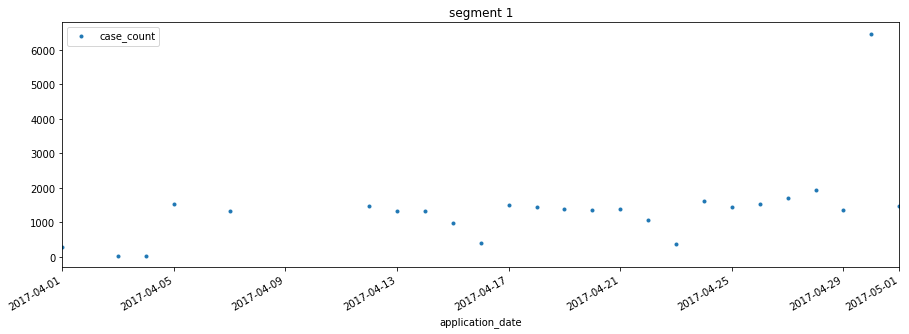

In [9]:
train_s1['2017-04-01':'2017-05-01'].plot(style='.', figsize=(15,5), title='segment 1')

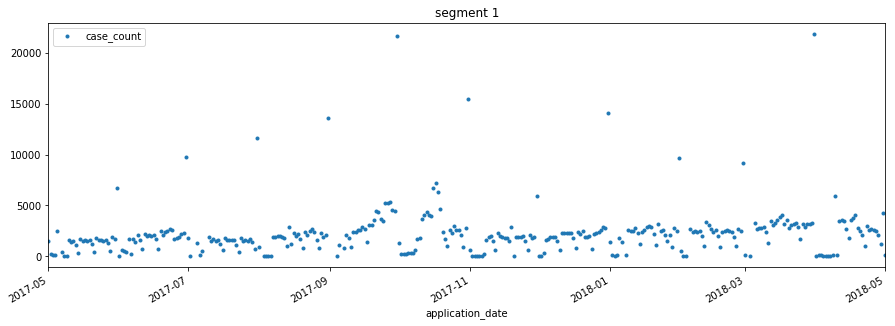

In [10]:
train_s1['2017-05-01':'2018-05-01'].plot(style='.', figsize=(15,5), title='segment 1')

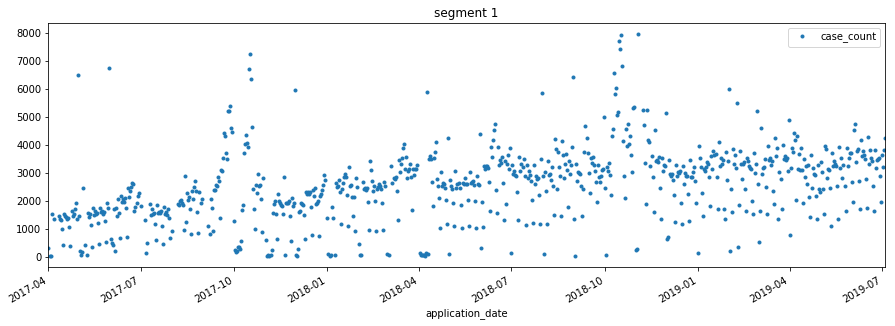

In [11]:
train_s1[(train_s1.case_count<8000) & (train_s1.case_count>15)].plot(style='.', figsize=(15,5), title='segment 1')

In [12]:
train_s1.loc[train_s1.case_count>=8000,'case_count']=np.nan
# train_s1.loc[train_s1.case_count<15,'case_count']=np.nan
train_s1=train_s1[train_s1.case_count>15]

In [13]:
train_s2.loc[train_s2.case_count>40000,'case_count']=np.nan

In [14]:
pd.plotting.register_matplotlib_converters()

In [15]:
# train_s2

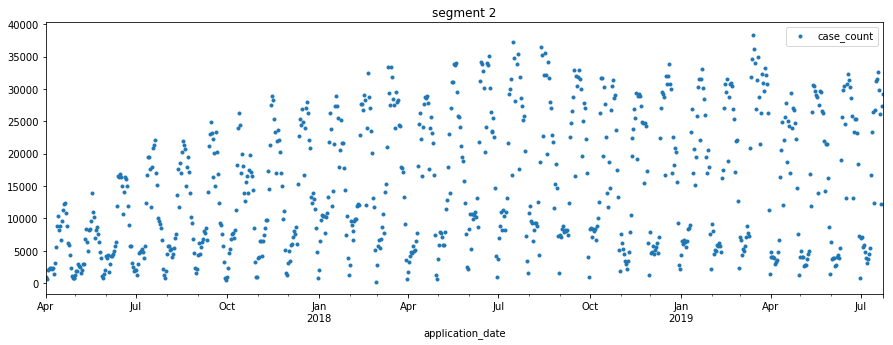

In [16]:
train_s2.plot(style='.', figsize=(15,5), title='segment 2')

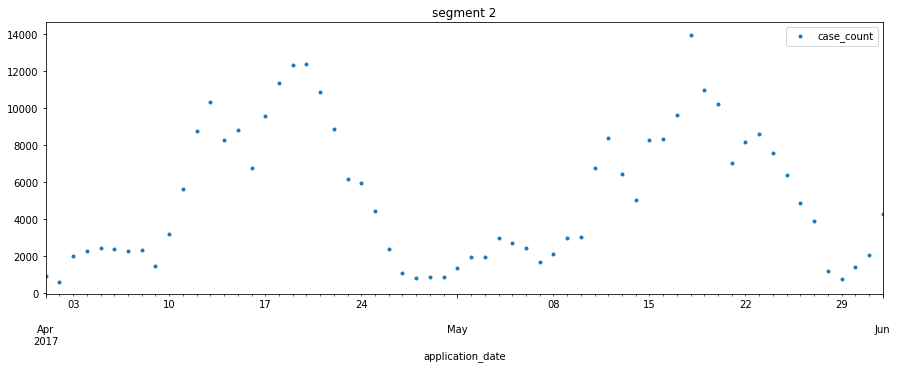

In [17]:
train_s2['2017-04-01':'2017-06-01'].plot(style='.', figsize=(15,5), title='segment 2')

In [18]:
train_s2.loc[train_s2.case_count>40000,'case_count']=np.nan

Segment 1

In [19]:
test_s1

""
application_date
2019-07-06
2019-07-07
2019-07-08
2019-07-09
2019-07-10
...
2019-09-26
2019-09-27
2019-09-28


In [20]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(train_s1, label='case_count')

features_and_target = pd.concat([X, y], axis=1)
features_and_target.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,case_count
application_date,,,,,,,,
2017-04-01,5,2,4,2017,91,1,13,299.0
2017-04-03,0,2,4,2017,93,3,14,42.0
2017-04-04,1,2,4,2017,94,4,14,23.0
2017-04-05,2,2,4,2017,95,5,14,1530.0
2017-04-07,4,2,4,2017,97,7,14,1341.0


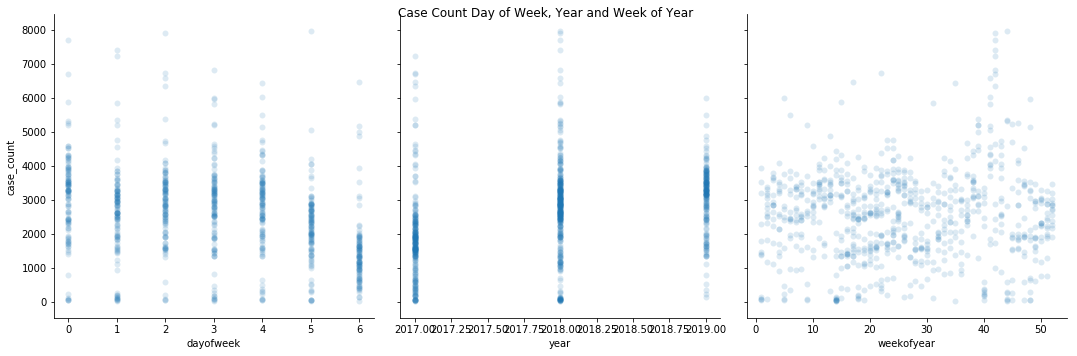

In [21]:
import seaborn as sns
sns.pairplot(features_and_target.dropna(),
             x_vars=['dayofweek',
                     'year','weekofyear'],
             y_vars='case_count',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Case Count Day of Week, Year and Week of Year')
plt.show()

In [22]:
from fbprophet.plot import add_changepoints_to_plot
def func(df,split_date,seg):
    split_date = split_date
    pd.plotting.register_matplotlib_converters()
    tr_s1 = df.loc[df.index <= split_date].copy()
    ts_s1 = df.loc[df.index > split_date].copy()
    ts_s1.rename(columns={'case_count': 'TEST SET'}).join(tr_s1.rename(columns={'case_count': 'TRAINING SET'}),how='outer').plot(figsize=(15,5), title='case count', style='.')
    plt.show()
    
    from fbprophet import Prophet
    from fbprophet.diagnostics import cross_validation
    params={}
#     params_2={}

    model=Prophet(**params)
    if seg=='s1':
        

        params={'growth':'linear','seasonality_mode':'additive','yearly_seasonality':True,'weekly_seasonality':True,'daily_seasonality':True}
        model = Prophet(**params).add_seasonality(name='monthly',period=30.5,fourier_order=5)\
            .add_seasonality(name='yearly',period=365.25,fourier_order=5)\
            .add_seasonality(name='quarter',period=365.25/4,fourier_order=5).add_seasonality(name='sem',period=365.25/2,fourier_order=5)\
        .add_seasonality(name='weekly',period=7,fourier_order=5).add_seasonality(name='s1',period=365.25/8,fourier_order=5).add_seasonality(name='weekly 1',period=5,fourier_order=5)
    else:
        params={'growth':'linear','seasonality_mode':'additive','yearly_seasonality':True,'weekly_seasonality':True,'daily_seasonality':True}
        model = Prophet(**params).add_seasonality(name='weekly',period=7,fourier_order=20).add_seasonality(name='monthly',period=30.5,fourier_order=20)\
            .add_seasonality(name='yearly',period=365.25,fourier_order=20).add_seasonality(name='weekly 1',period=5,fourier_order=5).add_seasonality(name='monthly 2',period=14,fourier_order=5)\
        .add_seasonality(name='quarter',period=365.25/4,fourier_order=5)
        
    
    model.fit(tr_s1.reset_index().rename(columns={'application_date':'ds','case_count':'y'}))
    ts_s1_p = model.predict(df=ts_s1.reset_index().rename(columns={'application_date':'ds'}))
    cv = cross_validation(model,horizon = '90 days')
    print('MAPE CV ',mean_absolute_percentage_error(y_true=cv.y,y_pred=cv.yhat))
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    fig = model.plot(ts_s1_p,ax=ax)
    plt.show()
    
    fig = model.plot_components(ts_s1_p)
    
    # Plot the forecast with the actuals
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    ax.scatter(ts_s1.index, ts_s1['case_count'], color='r')
    fig = model.plot(ts_s1_p, ax=ax)
    
    
    # Plot the forecast with the actuals
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    ax.scatter(ts_s1.index, ts_s1['case_count'], color='r')
    fig = model.plot(ts_s1_p, ax=ax)
    ax.set_xbound(lower=ts_s1.index.min(),upper=ts_s1.index.max())
    ax.set_ylim(0, 60000)
    plot = plt.suptitle('Forecast vs Actuals')
    print('MAPE ERROR',mean_absolute_percentage_error(y_true=ts_s1['case_count'],y_pred=ts_s1_p['yhat']))
    return params
    
    


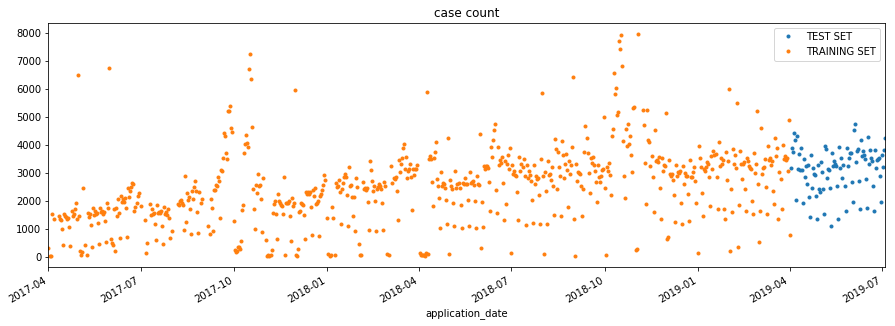

MAPE CV  92.6257189015488


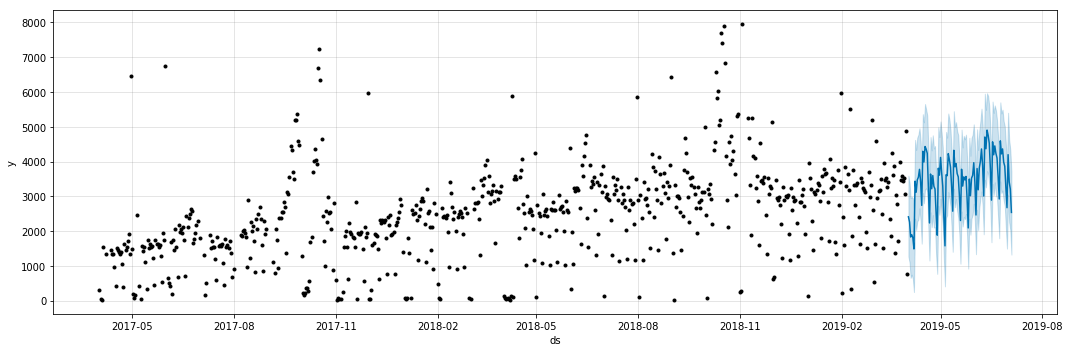

MAPE ERROR 25.785226246937548


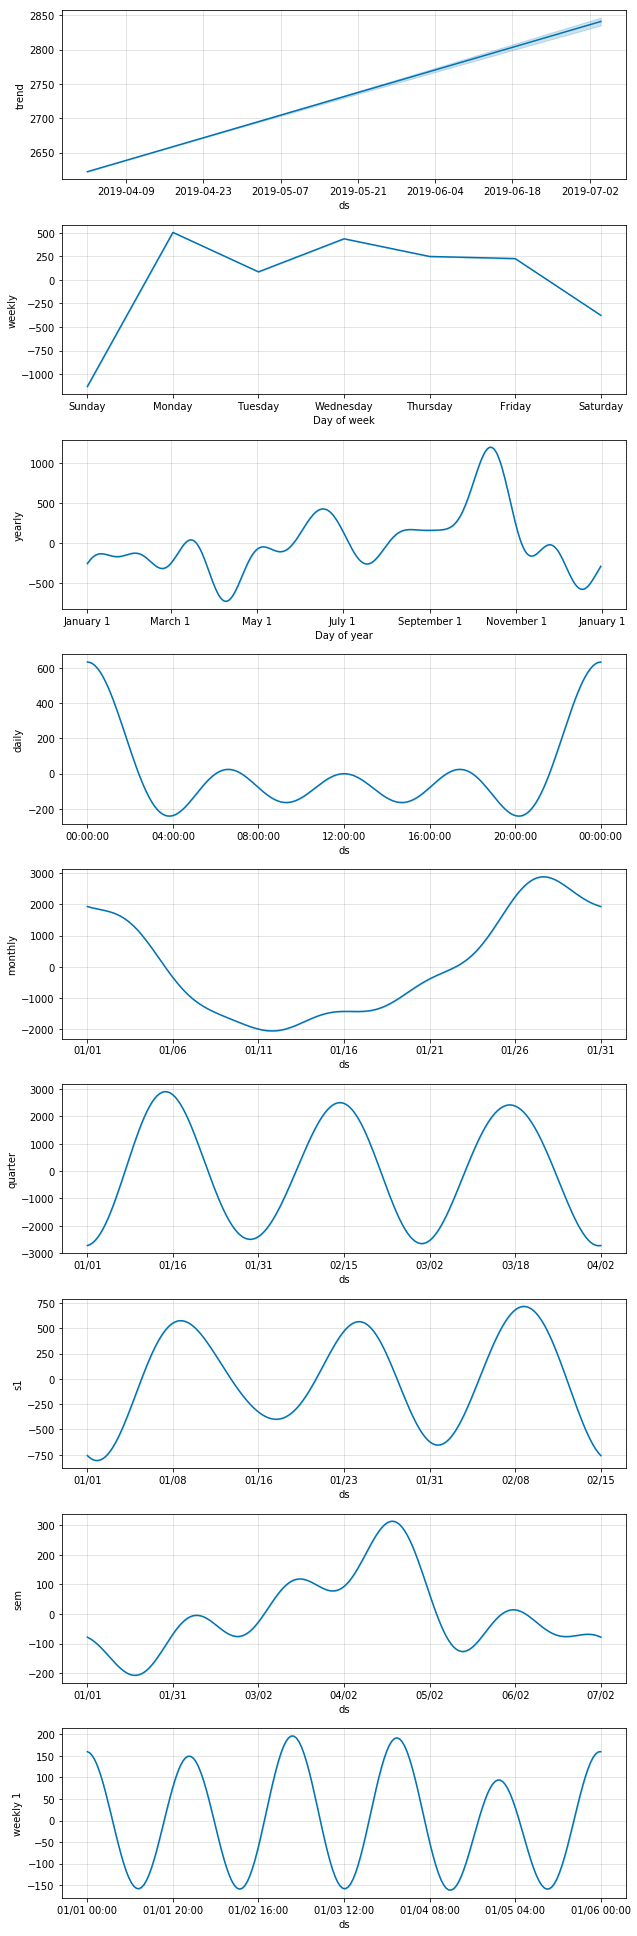

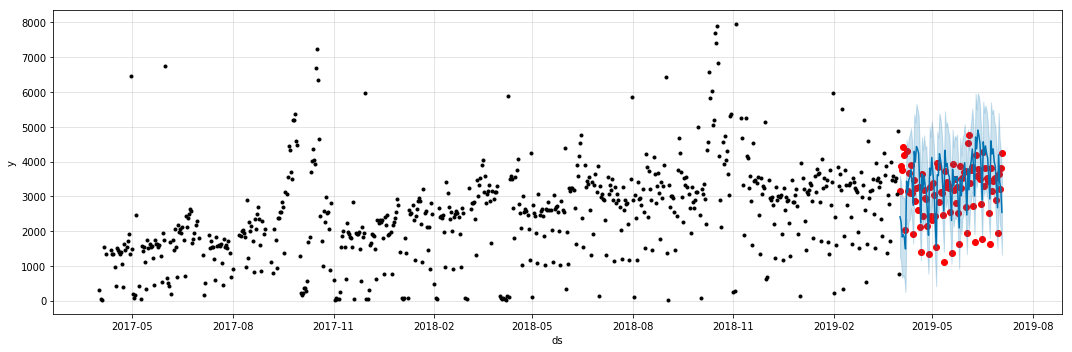

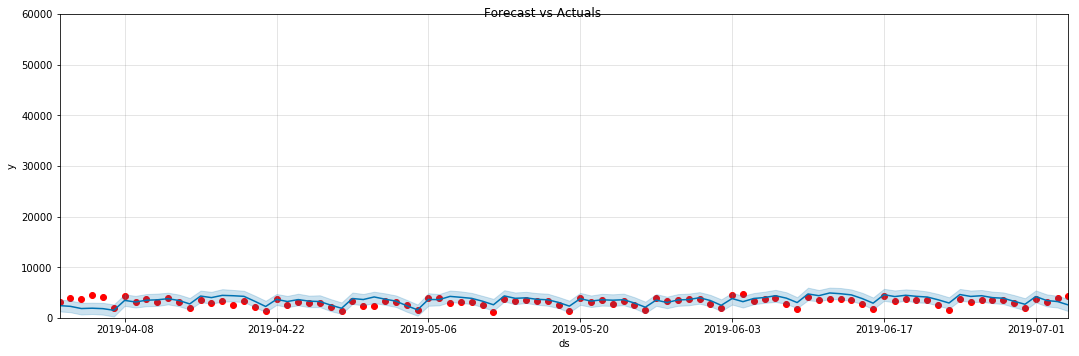

In [23]:
par={}
par['s1']=func(train_s1,'2019-04-01','s1')

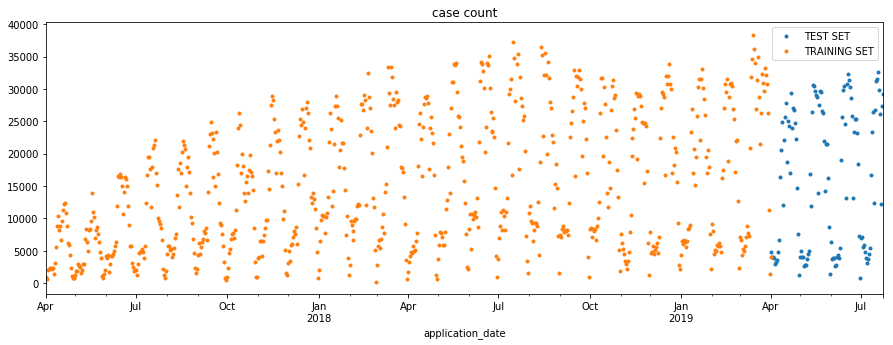

MAPE CV  44.522031830439964


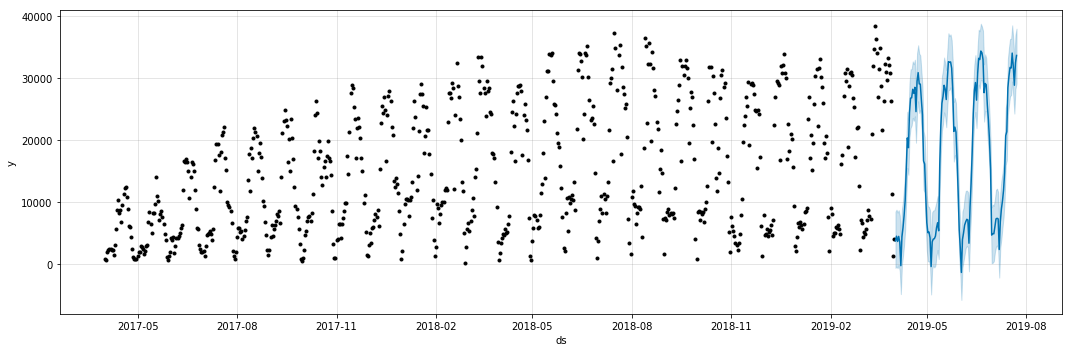

MAPE ERROR 46.20563778263217


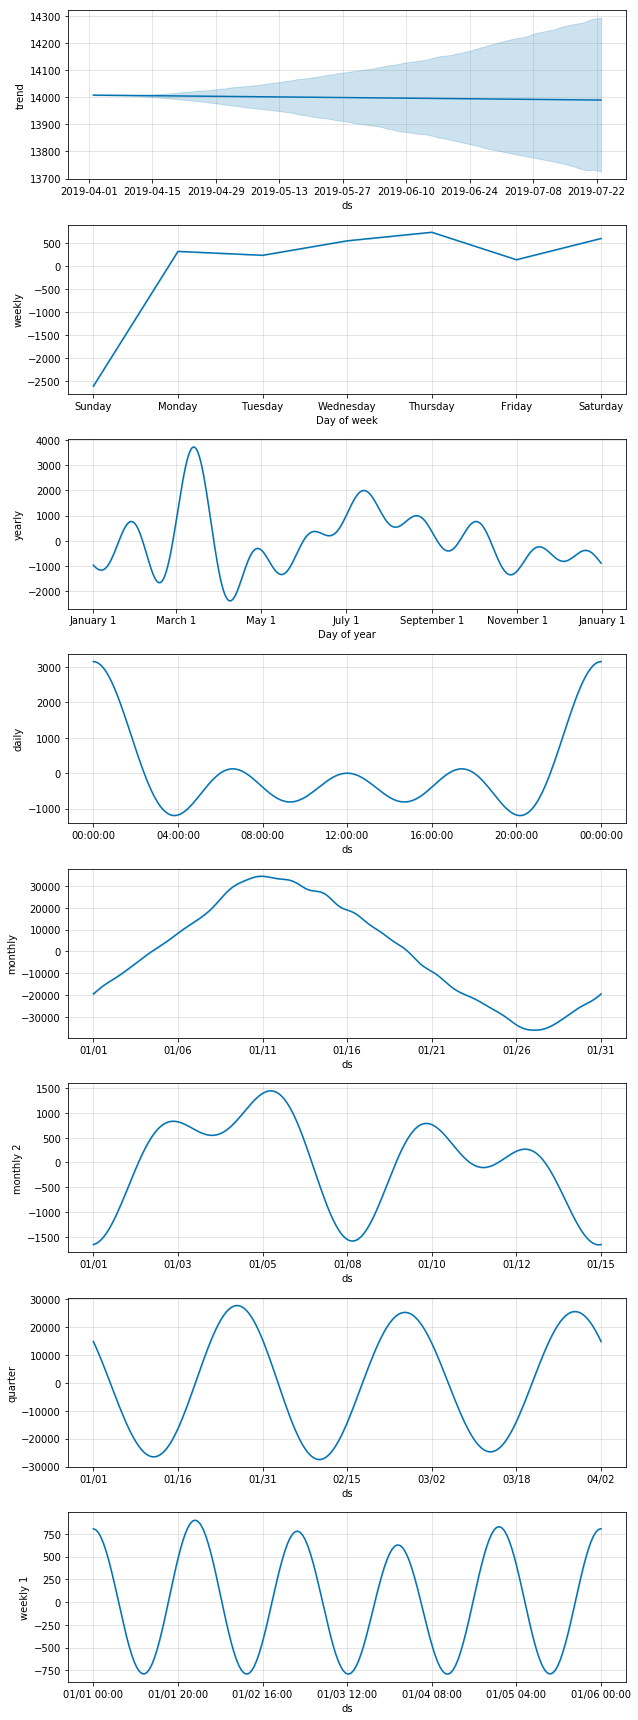

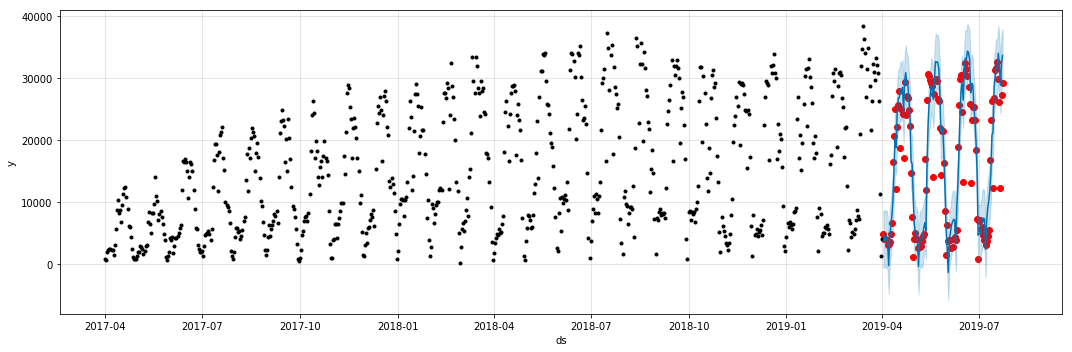

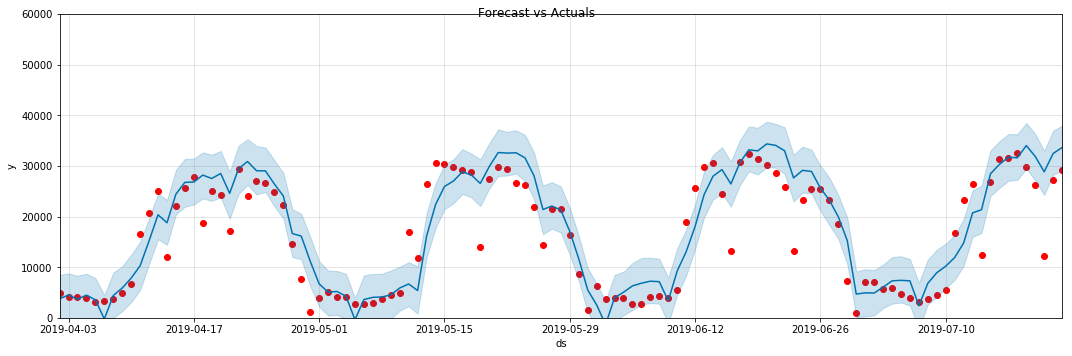

In [24]:
par['s2']=func(train_s2,'2019-04-01','s2')

In [25]:
# split_date = '2019-04-01'
# tr_s1 = train_s1.loc[train_s1.index <= split_date].copy()
# ts_s1 = train_s1.loc[train_s1.index > split_date].copy()
par

{'s1': {'growth': 'linear',
  'seasonality_mode': 'additive',
  'yearly_seasonality': True,
  'weekly_seasonality': True,
  'daily_seasonality': True},
 's2': {'growth': 'linear',
  'seasonality_mode': 'additive',
  'yearly_seasonality': True,
  'weekly_seasonality': True,
  'daily_seasonality': True}}

In [26]:
# Setup and train model and fit
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
# model = Prophet()
# model.fit(tr_s1_p)

73.77772778075044


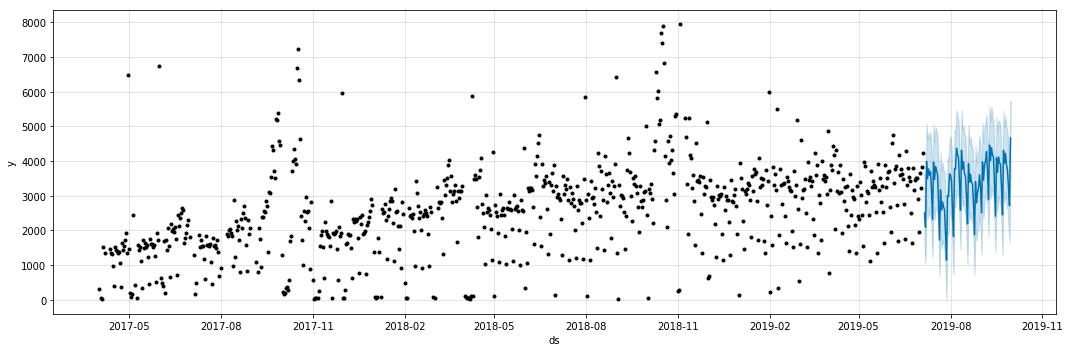

In [27]:
# model = Prophet(**par['s1']).add_seasonality(name='weekly',period=7,fourier_order=5).add_seasonality(name='monthly',period=30.5,fourier_order=5)\
#             .add_seasonality(name='yearly',period=365.25,fourier_order=20)

# model = Prophet(**par['s1']).add_seasonality(name='monthly',period=30.5,fourier_order=5)\
#             .add_seasonality(name='yearly',period=365.25,fourier_order=5)

model = Prophet(**par['s1']).add_seasonality(name='monthly',period=30.5,fourier_order=5)\
            .add_seasonality(name='yearly',period=365.25,fourier_order=5)\
            .add_seasonality(name='quarter',period=365.25/4,fourier_order=5).add_seasonality(name='sem',period=365.25/2,fourier_order=5)\
        .add_seasonality(name='weekly',period=7,fourier_order=5).add_seasonality(name='s1',period=365.25/8,fourier_order=5).add_seasonality(name='weekly 1',period=5,fourier_order=5)
model.fit(train_s1.reset_index().rename(columns={'application_date':'ds','case_count':'y'}))
y_s1 = model.predict(test_s1.reset_index().rename(columns={'application_date':'ds'}))
cv = cross_validation(model,horizon = '90 days')
print(mean_absolute_percentage_error(y_true=cv.y,y_pred=cv.yhat))
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(y_s1,ax=ax)
plt.show()

43.96794034292073


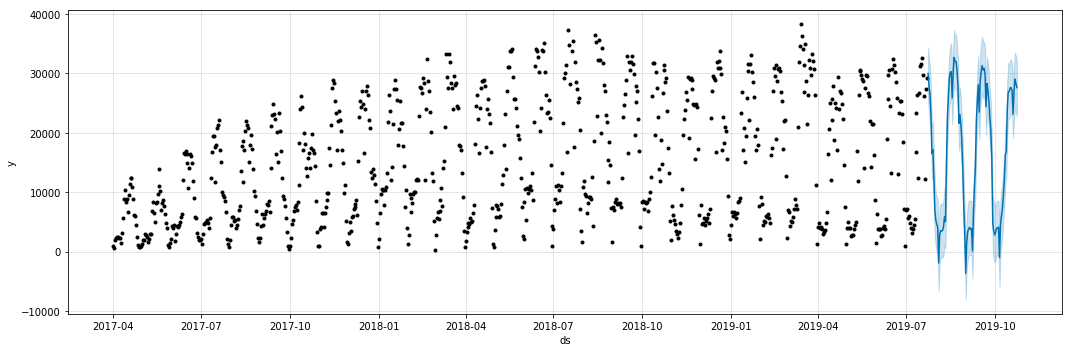

In [28]:
model=Prophet(**par['s2']).add_seasonality(name='weekly',period=7,fourier_order=20).add_seasonality(name='monthly',period=30.5,fourier_order=20)\
            .add_seasonality(name='yearly',period=365.25,fourier_order=20).add_seasonality(name='weekly 1',period=5,fourier_order=5).add_seasonality(name='monthly 2',period=14,fourier_order=5)\
        .add_seasonality(name='quarter',period=365.25/4,fourier_order=5)
model.fit(train_s2.reset_index().rename(columns={'application_date':'ds','case_count':'y'}))
y_s2 = model.predict(test_s2.reset_index().rename(columns={'application_date':'ds'}))
cv = cross_validation(model,horizon = '90 days')
print(mean_absolute_percentage_error(y_true=cv.y,y_pred=cv.yhat))
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(y_s2,ax=ax)
plt.show()

In [29]:
test.loc[test.segment==1, 'case_count']=y_s1['yhat'].values
test.loc[test.segment==2, 'case_count']=y_s2['yhat'].values

In [30]:
sum(y_s2['yhat'].values<0)

3

In [31]:
test[test['case_count']<0]
test.loc[test.case_count<0,'case_count']=0

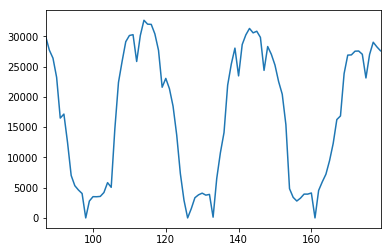

In [32]:
test[test.segment==2]['case_count'].plot()

In [33]:
test.to_csv('prophet_sub8_remov_out.csv',index=False)